In [29]:
# TODO Geo Daten anzeigen (wo wie verztilt sind)

In [30]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Load Functions
from functions import *

In [31]:
df = load_data()

df.head()

,district,style,extwall,stories,year_built,units,bdrms,fbath,hbath,lotsize,sale_date,sale_price,address_nn
0,1,Cape Cod,Aluminum / Vinyl,1.5,1959,1,4,2,0,7000,2018-07,129000,N 38TH ST
1,1,Cape Cod,Brick,1.0,1951,1,3,2,1,8100,2018-08,67000,N 52ND ST
2,1,Cape Cod,Brick,1.5,1938,1,3,1,1,5040,2018-02,103000,N 13TH ST
3,1,Cape Cod,Aluminum / Vinyl,1.5,1960,1,4,2,0,6000,2018-03,150000,W HELENA ST
4,1,Cape Cod,Aluminum / Vinyl,1.0,1954,1,4,2,1,4920,2018-03,89900,N 39TH ST


In [32]:
''' 
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter

df_geo = df[['Address']]
df_geo = df_geo.drop_duplicates()
df_geo = df_geo.dropna(subset=["Address"])
df_geo
'''


' \nfrom geopy.geocoders import Nominatim\nimport folium\nfrom geopy.extra.rate_limiter import RateLimiter\n\ndf_geo = df[[\'Address\']]\ndf_geo = df_geo.drop_duplicates()\ndf_geo = df_geo.dropna(subset=["Address"])\ndf_geo\n'

In [33]:
''' 
# Erstellung eines Profilingreports
pr = ProfileReport(df, title = 'Property Sales') 
filename_pr = "../output/property_sales_pr.html" 
path_pr = os.path.abspath(filename_pr) 

pr.to_file(path_pr)  # ProfileReport als HTML speichern
webbrowser.open(f"file://{path_pr}")  # ProfileReport im Browser öffnen
'''

' \n# Erstellung eines Profilingreports\npr = ProfileReport(df, title = \'Property Sales\') \nfilename_pr = "../output/property_sales_pr.html" \npath_pr = os.path.abspath(filename_pr) \n\npr.to_file(path_pr)  # ProfileReport als HTML speichern\nwebbrowser.open(f"file://{path_pr}")  # ProfileReport im Browser öffnen\n'

In [34]:
# Ausgabe der numerischen und kategorischen Variablen 
numericalVar = [col for col in df if df[col].dtype != 'object']
print(f"Numerische Variablen: {numericalVar}")

categoricalVar = [col for col in df if df[col].dtype == 'object']
print(f"Kategorische Variablen: {categoricalVar}")

Numerische Variablen: ['district', 'stories', 'year_built', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize', 'sale_price']
Kategorische Variablen: ['style', 'extwall', 'sale_date', 'address_nn']


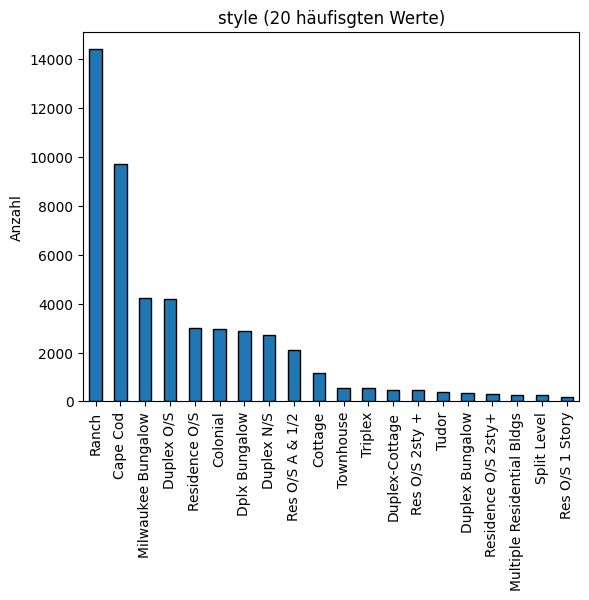

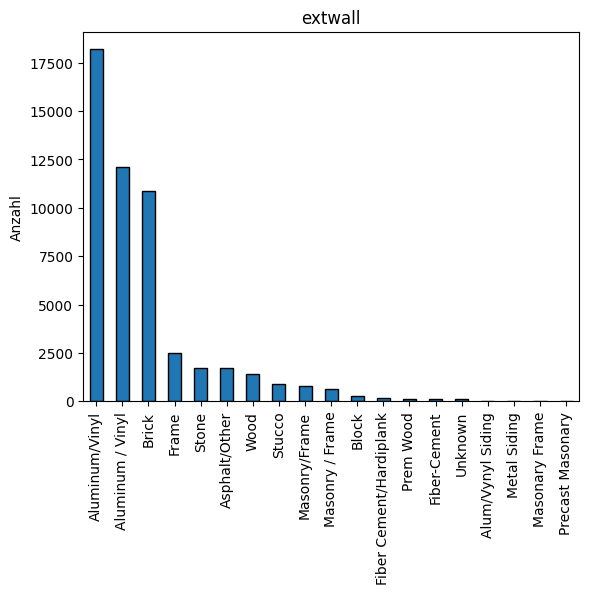

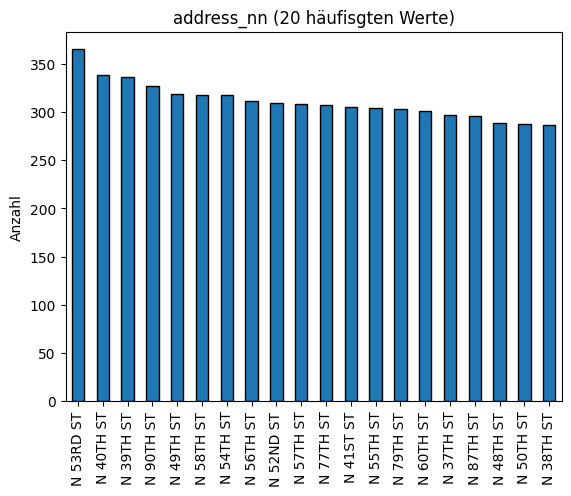

In [35]:
for i in categoricalVar:
    if i == 'sale_date':
        continue
    elif i not in ['condoproject', 'style', 'address_nn']:
        count_temp = df[i].value_counts()
        count_temp.plot(kind="bar", edgecolor="black")
        plt.title(i)
        plt.xlabel('')
        plt.ylabel("Anzahl")
        plt.show()
    else:
        count_temp = df[i].value_counts().head(20)
        count_temp.plot(kind="bar", edgecolor="black")
        plt.title(f"{i} (20 häufisgten Werte)")
        plt.xlabel('')
        plt.ylabel("Anzahl")
        plt.show()


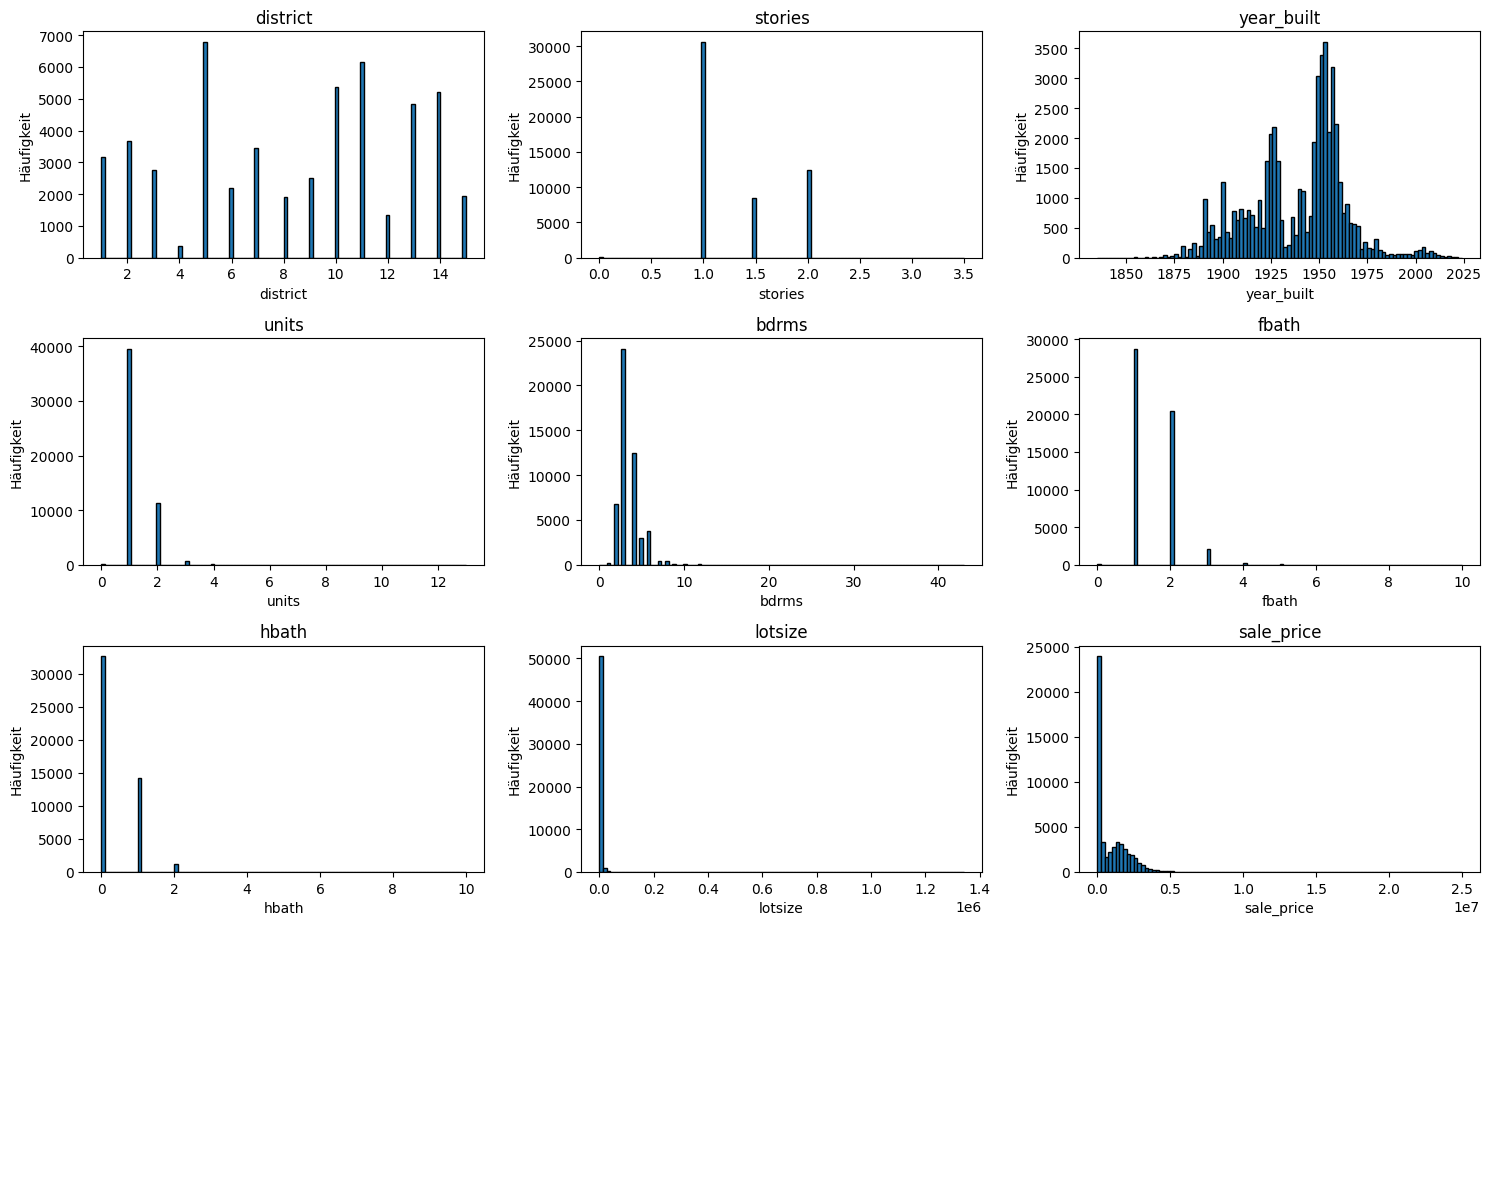

In [36]:
num_vars = df.select_dtypes(include=['number']).columns

# 4x3 Grid erstellen
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()  # in 1D-Array umwandeln, damit man einfacher iterieren kann

for i, col in enumerate(num_vars):
    axes[i].hist(df[col], bins=100, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Häufigkeit")
for j in range(len(num_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

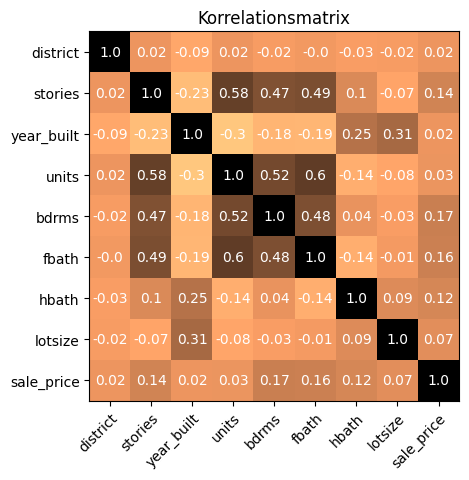

In [37]:
corr = df.select_dtypes(exclude=["object", "period[M]"]).corr().round(2)


fig, ax = plt.subplots()
ax.imshow(corr, cmap=plt.get_cmap("copper_r"))
ax.set_xticks(np.arange(len(corr)), labels=corr.columns.to_list())
ax.set_yticks(np.arange(len(corr)), labels=corr.columns.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, corr.iloc[i, j], ha="center", va="center", color="w")

ax.set_title("Korrelationsmatrix")
plt.show()

<Axes: >

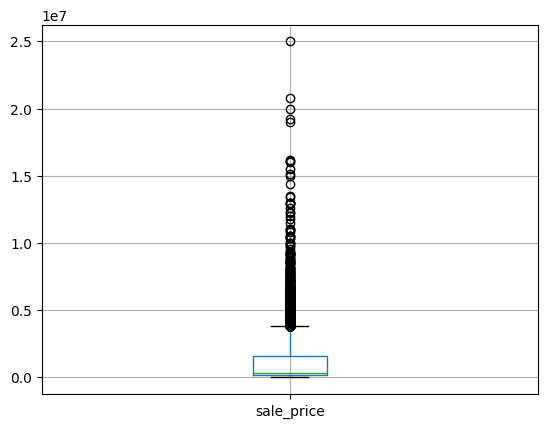

In [38]:
df[["sale_price"]].boxplot()

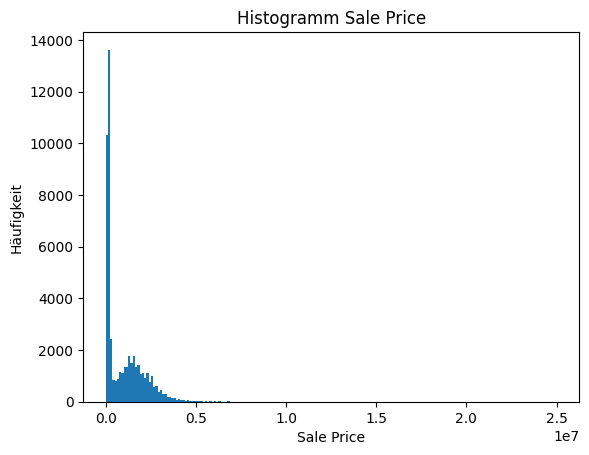

In [39]:
plt.hist(df['sale_price'], bins = 200)
plt.xlabel('Sale Price')
plt.ylabel('Häufigkeit')
plt.title('Histogramm Sale Price')
plt.show()

***
***